In [2]:
import numpy as np
import matplotlib.pyplot as plt
import kcorrect 
import math
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
%matplotlib inline

 array input form
 ukidds: 0 yPetroMag, 1 yPetroMagErr, 2 hPetroMag, 3 hPetroMagErr, 4 kPetroMag, 5 kPetroMagErr,
 wise: 6 w1mpro, 7 w1sigmpro, 8 w2mpro , 9 w2sigmpro, 10 w3mpro, 11 w3sigmpro, 12 w4mpro, 13 w4sigmpro,
 galex: 14 nuv_mag, 15 nuv_magerr, 16 fuv_mag, 17 galex.fuv_magerr, 
 sdss: 18 modelMag_u, 19 modelMag_g, 20 modelMag_r, 21 modelMag_i, 22 modelMag_z, 23 modelMagErr_u,               24 modelMagErr_g , 25 modelMagErr_r, 26 modelMagErr_i, 27 modelMagErr_z, 28 petroMagr,  m.z


In [3]:
def plot_hist(array,bin_num):
    n, bins, patches = plt.hist(array,bins=bin_num)
    plt.close()
    return bins, n

def make_graphs(file_str, nbins, title_str = None, save_str = 'images/null', x_lim = None, w = 20, h =10, colour='k'):
    array = np.load(file_str)
    print(array.shape)
    # create histogram and convert from arcminutes to arcseconds
    bins, n = plot_hist([row[1]*60. for row in array],nbins)
      
   
    step = 0.5*(bins[1]-bins[0])
    
    fig = plt.figure(figsize=(w,h))
    plt.plot(bins[:-1]+step, n, colour)
    plt.xlabel('Distance (arcseconds)', fontsize ='12' )
    plt.ylabel('Frequency', fontsize ='12')
    if title_str != None:
        plt.title(title_str)
    plt.xlim(0,x_lim)
    #plt.savefig(save_str)
    
    return 

In [4]:
def plot_contour(x_contour,y_contour):            
    # now let's overplot some contours. First we have to make a 2d
    # histogram of the point distribution.
    vals, xedges, yedges = np.histogram2d(x_contour, y_contour, bins=100)
       
    # Now we have the bin edges, but we want to find the bin centres to
    # plot the contour positions - they're half way between the edges:
    xbins = 0.5 * (xedges[:-1] + xedges[1:])
    ybins = 0.5 * (yedges[:-1] + yedges[1:])
    
    # now plot the contours
    plt.contour(xbins, ybins, vals.T, 10, colors='k')
    #plt.xlim([-22,-17])
    #plt.ylim([1.1,3.4])
    plt.xlabel('M r,petro')
    plt.ylabel('(u-r)model')
    title_str = 'Observed bivariate distribution of the MGS in rest-frame color vs. absolute magnitude.'
    plt.title(title_str)

In [46]:
def get_colours(filename,upper_mag_idx,lower_mag_idx,low_z=0.004,high_z=0.08):
    
    # data results
    x = []
    y = []
    
    # load items for kcorrections
    
    array = np.load(filename)
    
    print('Number of results:',len(array))
    
    for row in array:
        if row[upper_mag_idx] > 0 and row[lower_mag_idx] > 0:
            # kcorrect
            if row[-1] > low_z and row[-1] < high_z:
                x.append(row[upper_mag_idx]-row[lower_mag_idx])
                y.append(row[-2])
    
    return x,y  

def plot_histogram(filename,upper_mag_idx,lower_mag_idx,nbins,low_z=0.004,high_z=0.08):
    
    x,y = get_colours(filename,upper_mag_idx,lower_mag_idx,low_z,high_z)

    print('Redshift selected:',len(x),len(y))
    
    bins, n = plot_hist(x,nbins)
    step = 0.5*(bins[1]-bins[0])
    
    fig = plt.figure(figsize=(20,10))
    plt.plot(bins[:-1]+step, n)
    
def look_at_colour(filename,i):
    array = np.load(filename)

    bins, n = plot_hist([row[i] for row in array if row[i] > 0],2000)
    step = 0.5*(bins[1]-bins[0])

    print(len(bins[:-1]),len(n))
    
    fig = plt.figure(figsize=(20,10))
    plt.plot(bins[:-1]+step, n)   
    print(len([row[i] for row in array if row[i] > 0]))

Number of results: 115684
Redshift selected: 76687 76687


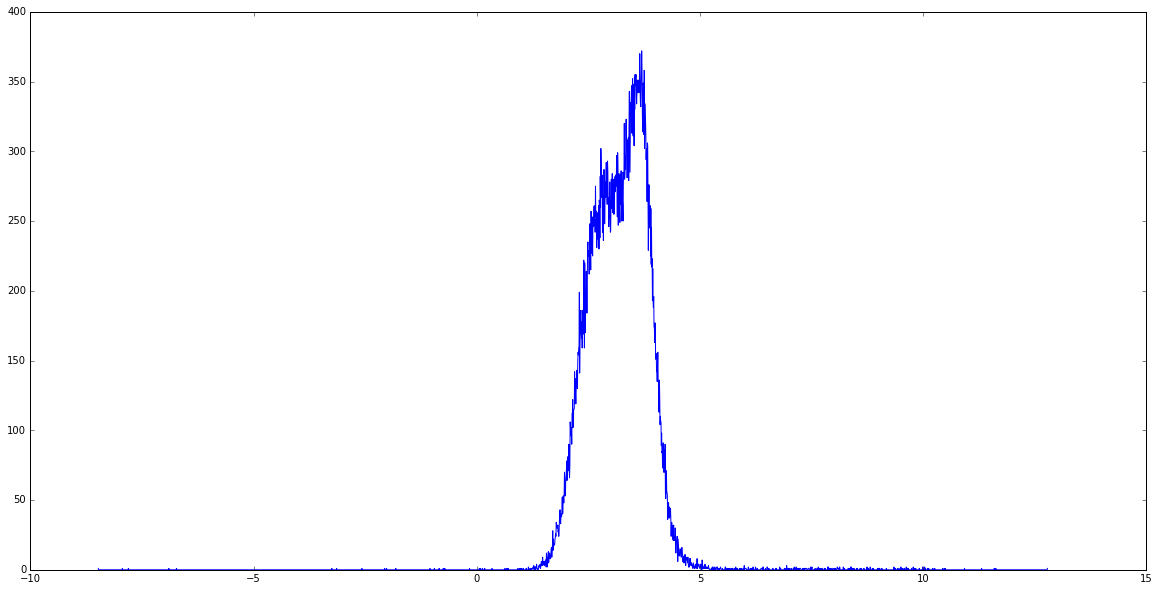

In [47]:
plot_histogram('/home/calum/Documents/Mphys_data/mgs_multiwavelength/first_all_colours.npy',18,22,3000,low_z=0.08,high_z=2.0)

Number of results: 115684
Redshift selected: 50753 50753


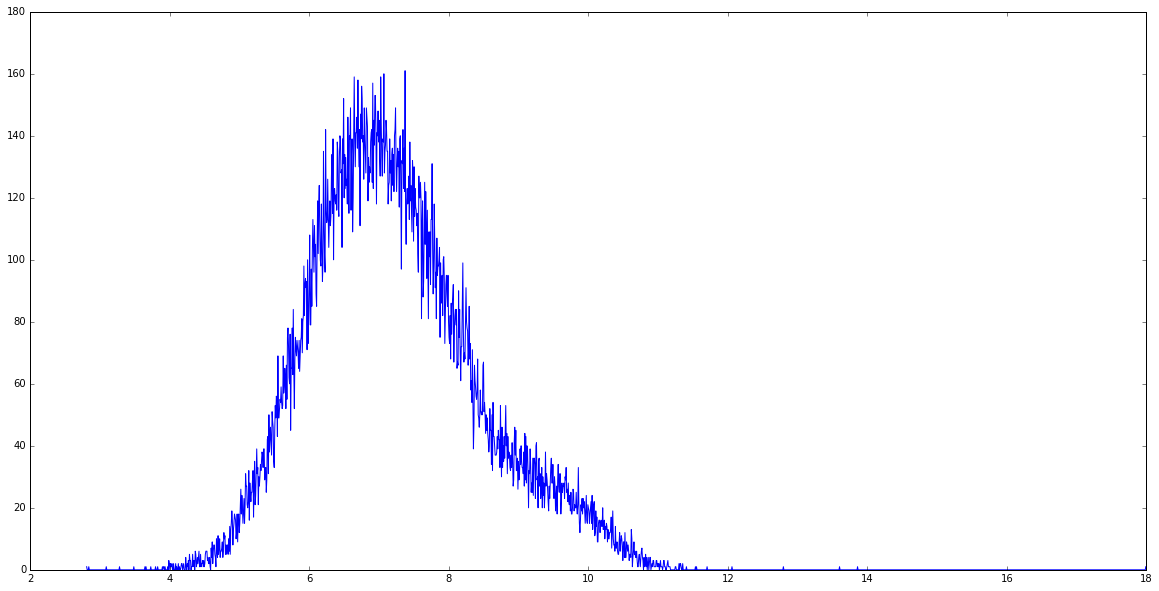

In [49]:
plot_histogram('/home/calum/Documents/Mphys_data/mgs_multiwavelength/first_all_colours.npy',16,8,2000,low_z=0.08,high_z=2.0)

Number of results: 115684
Redshift selected: 28364 28364


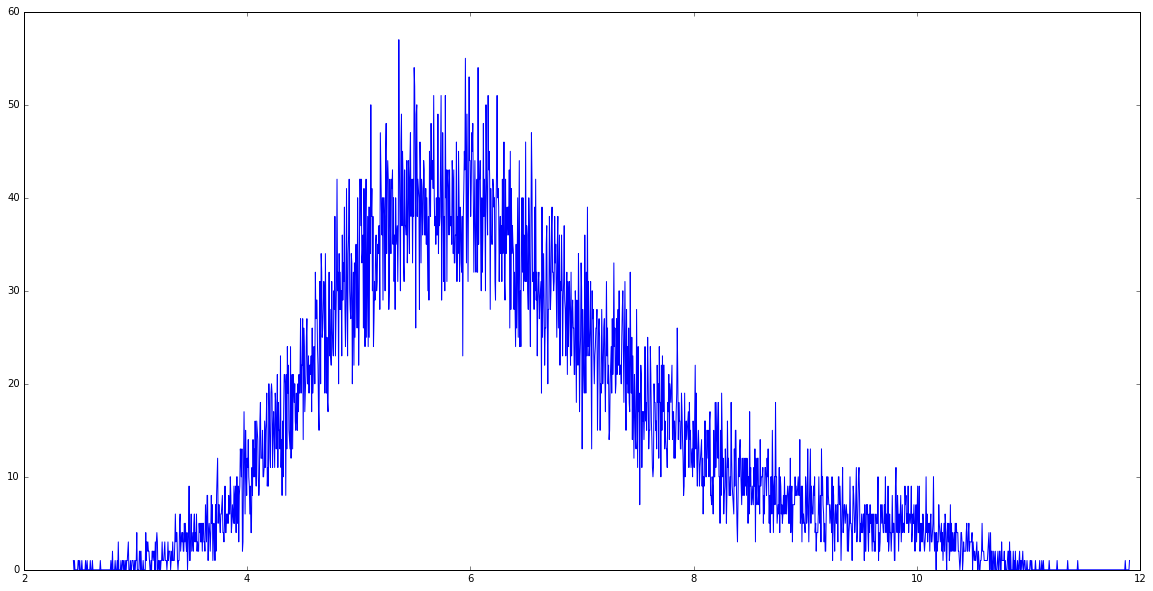

In [50]:
plot_histogram('/home/calum/Documents/Mphys_data/mgs_multiwavelength/first_all_colours.npy',16,8,2000)

2000 2000


(10, 20)

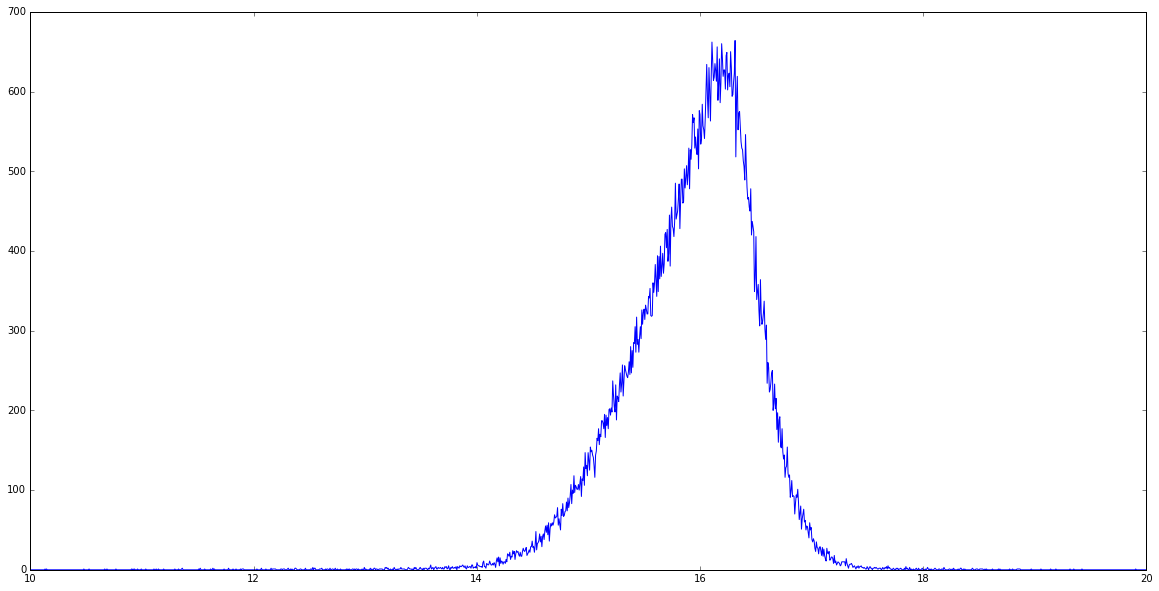

In [13]:
bins, n = plot_hist([row[0] for row in array if row[0] > 0],2000)
step = 0.5*(bins[1]-bins[0])

print(len(bins[:-1]),len(n))
    
fig = plt.figure(figsize=(20,10))
plt.plot(bins[:-1]+step, n)
plt.xlim(10,20)

In [12]:
for i in range(0,30):
    print(i,min([row[i] for row in array if row[i] > 0]),max([row[i] for row in array]),np.mean([row[i] for row in array]))

0 6.91330385208 20.2822322845 -32545523.0627
1 7.75894950493e-05 1.46364533901 -32545538.4414
2 6.12592601776 17.9362506866 -25751156.7034
3 6.24978347332e-05 0.608669221401 -25751171.0415
4 6.00590181351 18.1354904175 -21204290.3366
5 8.42035224196e-05 1.24249529839 -21204304.307
6 4.03599977493 16.6630001068 14.2506768188
7 0.019999999553 0.289999991655 0.0315939630464
8 3.62599992752 16.9810009003 -25918.6616155
9 0.0189999993891 0.533999979496 -95086.5132941
10 2.88199996948 13.5240001678 -129652.305845
11 0.00899999961257 0.542999982834 -156339603.797
12 1.14100003242 9.94600009918 -34568.3187356
13 0.01600000076 0.542999982834 -537593514.601
14 12.4998874664 25.5195674896 -14.3953784931
15 0.0004794022243 2.57717466354 -34.4254082334
16 12.5912294388 25.6367263794 -300.823812136
17 0.00298549886793 73.7121429443 -315.049158093
18 12.3781013489 31.7713184357 19.4887166347
19 12.4678163528 28.0471363068 17.944190016
20 11.6914272308 27.8203811646 17.1555232826
21 11.3048887253 28.9

# setting things up    
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
kcorrect.load_templates()
kcorrect.load_filters()

# form of input for fit_coeff
# redshift umaggies gmaggies rmaggies imaggies zmaggies uinvvar ginvvar rinvvar iinvvar zinvvar
# output: redshift u_rec g_rec r_rec i_rec z_rec
    
#tbl = pd.read_csv('/home/calum/QA_data/large_MGS_sample.csv') 
#array = tbl.as_matrix()

x = []
y = []

array = np.load('/home/calum/Documents/MPhysProj/mgs_sample/mgs_kcorrect_array.npy')

print('Number of results:',len(array))
print('Starting for loop...')

# need to sort out the coefficents so they're in units of maggies!
#Note that the conversion to the inverse variances from the maggies and the magnitude errors is (0.4 ln(10) × maggies × magerr)-2
# maggies are simply related to magnitudes by 10−0.4m
for row in array:
    # kcorrect
    maggies = np.array(pow(10,-0.4*row[2:7]))
    invar = pow(0.4*math.log(10)*maggies*np.array(row[7:-2]),-2) 
    k_tuple = np.concatenate(([row[1]],maggies,invar))
    kcorrect_tuple = kcorrect.fit_coeffs(k_tuple)
    k_coeff = kcorrect.reconstruct_maggies(kcorrect_tuple)
    final_input = maggies/np.array(k_coeff[1:])
    kcorrection_array = [-2.5*math.log(item,10) for item in final_input]
    # put above in a function probs 
    y_val = float(row[2]) - kcorrection_array[1] - float(row[4]) + kcorrection_array[3]
    z = k_coeff[0]
    if y_val > 0 and y_val < 3.5:
        if z > 0.004 and z < 0.080:
            x_val = float(row[0])-5*(math.log(cosmo.luminosity_distance(z).to(u.pc).value/10 ,10))
            if x_val < -15.5 and x_val > -23.5: 
                x.append(x_val)
                y.append(y_val)

In [10]:
array.shape

(115684, 30)